# Game of War (cards) Simulation #
Simulate the game of War (card game).

Ths notebook will simulate playing the card came War.  It will play it _n_ number of times and report basic statistics at the end:  number of games played, number of hands played, number of wins by each player (would expect this to be roughly 50-50), and the number of wars waged.


Number of players:  2

Objective: Collect all of the cards in a standard deck of playing cards (excluding Jokers).

Rules:
  1.  The entire deck of cards is dealt in an alternating fashion to each player (each player receives 26 cards).
  2.  Player 1 lays a card from the top of their deck face up on the table.  Player 2 does the same.
  3.  The card with the highest value wins the "battle". The winning player collects all of the cards and sets them aside, face down.  (Cards are valued 2 - A with 2 the lowest card and ace the highest.)
  4.  This process continues until each player lays down a card of equal value.  This is a war!
  5.  Procedures for a war:
  
    a.  Each player lays down three cards face down.
    
    b.  The fourth card is dealt face up.  The card with the highest value (same as rule #3) wins the war and collects all of the cards.
    
    c.  It is possible that the fourth cards dealt could be of the same value, which incites an additional war.  In this case the process repeats (steps a and b).  The winner takes all of the cards.
    
    d.  If a player does not have enough cards to complete the war (4 cards), they lose and the other player wins by default.

  6.  When a player exhausts their deck of cards, their discard deck is played (without shuffling).


In [55]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

games_to_play = 10000  # change this value to play more or fewer games

verbose = False  # change for more/less output
suits = ['H', 'D', 'S', 'C']
cards = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
deck = []
player1 = []
player2 = []

In [56]:
def create_deck():
    """
    Create a list representing a deck of shuffled cards.  Individual cards are represented as suit followed by value:  
      H2 = two of hearts,
      S10 = ten of spades,
      DQ = queen of diamonds,
      CA = ace of clubs, etc.
      
      Returns
      -------
      cut_deck : list - representing a shuffled deck of cards
    """
    card_deck = []
    cut_deck = []

    # create deck of cards
    for suit in suits:
        for card in cards:
            card_deck.append(suit + card)
    random.seed()        
    random.shuffle(card_deck)
    
    # cut deck
    cut_card = random.randint(0, 51)
    top_deck = card_deck[:cut_card]
    bottom_deck = card_deck[cut_card:]
    bottom_deck.extend(top_deck)
    cut_deck = bottom_deck
    
    # finish shuffle
    random.shuffle(cut_deck)
    return cut_deck
  

def deal_cards(deck):
    """
    Deal cards to each player.
    
    Parameters
    ----------
    deck : list - representing a shuffled deck of cards
    
    Returns
    -------
    p1, p2 : list - representing hands dealt to player 1 and player 2
    """
    p1 = []
    p2 = []
    
    for i in range(len(deck)):
        if i % 2 == 0:
            p1.append(deck[i])
        else:
            p2.append(deck[i])

    return p1, p2
    

def get_card_value(card):
    """
    Determine the value of a card for comparison purposes.  The value is determined by finding the index of the card's value
    in the cards[] list.  The suit is meaningless in War, so only the value portion of the card is used.
    
    Parameters
    ----------
    card : str - represents a card.  For example: 'SK' (king of spades), 'D3' (three of diamonds)
    
    Returns
    -------
    int - index of card value in cards[] list
    """
    return cards.index(str(card)[1:])


def play_a_game(player1, player2):
    """
    Play a single game of War.  In a loop, each player plays thier [0] card and compares their values to determine the
    "battle" winner.  The loop continues while both players have cards (size of thier deck is greater than 0).  As soon as
    one player losses all thier cards, the game ends.
    
    If the cards played are equal, the goto_war() function is called.
    
    If player 1 wins, he collects all the played cards.  If player 2 wins, she collects all the played cards.  This
    is achieved by appending the loser's card to the end of the winner's deck.  Then, appending the winner's card the end
    of his/her own deck.  These two steps effectively put the cards in the discard pile.  Finally, the [0] card is removed
    from each player's hand.
    
    Parameters
    ----------
    player1, player2 : list - representing cards to play
    
    Returns
    -------
    hands : int - the number of "battles"
    wars : int - the number of wars waged
    player1, player2 : list - players hands at the end of the game.  One of these should have length 0 and the other 52
    """
    
    hands = 0
    wars = 0
    
    # play until one player does not have any cards left
    while len(player1) > 0 and len(player2) > 0:
        hands += 1
        
        # WAR!
        if get_card_value(player1[0]) == get_card_value(player2[0]):
            if verbose:
                print('{}: [{}] {} ** WAR! ** {} [{}]'.format(hands, len(player1), player1[0], player2[0], len(player2)))
                
            _, player1, player2, wars = goto_war(player1, player2, wars)
            
        # player1 wins
        elif get_card_value(player1[0]) > get_card_value(player2[0]):
            if verbose:
                print('{}: [{}] {} > {} [{}]'.format(hands, len(player1), player1[0], player2[0], len(player2)))
                
            # put player2 card at end of player1 deck
            player1.append(player2[0])
            # remove player2 card
            player2 = player2[1:]
            # move player1 card to end of deck
            player1.append(player1[0])
            # remove played card from top of deck
            player1 = player1[1:]

        
        # player2 wins
        else:
            if verbose:
                print('{}: [{}] {} < {} [{}]'.format(hands, len(player1), player1[0], player2[0], len(player2)))
                
            # put player1 card at end of player2 deck
            player2.append(player1[0])
            # remove player1 card
            player1 = player1[1:]
            # move player2 card to end of deck
            player2.append(player2[0])
            # remove played card from top of deck
            player2 = player2[1:]            

        # print('Player1 deck =', player1)
        # print('player2 deck =', player2)
        
    return hands, wars, player1, player2


def goto_war(player1, player2, wars):
    """
    Implement the war.  If any player posesses fewer than four cards they default and the other player wins.  If both
    players are able to "fight", then each player removes four cards from thier deck.  The value of the fourth card
    determines the winner of the battle.  Note this function is recursive!  It is possible to have multi-layered wars.
    
    Parameters
    ----------
    player1, player2 : list - current player decks of cards
    wars : int - number of wars fought
    
    Returns
    -------
    winner : str - the winner of the war
    player1, player2 : list - player decks after the war
    wars : int - updated number of wars fought
    
    """
    winner = ''
    wars += 1
    
    # goto war
    if len(player1) > 4 and len(player2) > 4:
        
        # deal off three cards and remove from decks
        player1_war_cards = player1[0:5]
        player1 = player1[5:]
        # print('player1 war cards', player1_war_cards)
        # print('player1=', player1)
        player2_war_cards = player2[0:5]
        player2 = player2[5:]
        # print('player2 war cards', player2_war_cards)
        # print('player2=', player2)
        
        player1_war_card = player1_war_cards[4]
        player2_war_card = player2_war_cards[4]
        
        # WAR again!
        if get_card_value(player1_war_card) == get_card_value(player2_war_card):
            if verbose:
                print('     {} ** WAR Again! ** {}'.format(player1_war_card, player2_war_card))
            
            winner, player1, player2, wars = goto_war(player1, player2, wars)
            
            # account for cards sacraficed in the parent war
            if winner == 'player1':
                player1.extend(player1_war_cards)
                player1.extend(player2_war_cards)
            else:
                player2.extend(player2_war_cards)
                player2.extend(player1_war_cards)
            
        # player1 wins war
        elif get_card_value(player1_war_card) > get_card_value(player2_war_card):
            if verbose:
                print('     {} > {} - player1 wins WAR'.format(player1_war_card, player2_war_card))
            player1.extend(player1_war_cards)
            player1.extend(player2_war_cards)
            winner = 'player1'
        
        # player2 wins war
        else:
            if verbose:
                print('     {} < {} - player2 wins WAR'.format(player1_war_card, player2_war_card))
            player2.extend(player2_war_cards)
            player2.extend(player1_war_cards)
            winner = 'player2'  
    
    # player1 wins by default
    elif len(player2) < 4:
        if verbose:
            print('     player1 wins WAR by default')
        player1.extend(player2)
        player2 = []
        winner = 'player1'
        
    # player2 wins by default
    else:
        if verbose:
            print('     player2 wins WAR by default')
        player2.extend(player1)    
        player1 = []
        winner = 'player2'
    
    # print('player1=', player1)
    # print('player2=', player2)
    # print('winner=', winner)
    
    return winner, player1, player2, wars


In [80]:
"""
Main processing loop
"""

# init aggregate varibles
i = 0
p1_tot = 0
p2_tot = 0
h = 0
w = 0
max_h = -1
min_h = 100
max_w = -1
min_w = 100

# open output file
f = open('war_sim.csv', 'w')
f.write('hands,wars,player1,player2\n')

# data = pd.DataFrame(columns={'hands': int(),'wars': int(),'player1': int(),'player2': int()})

while i in range(0, games_to_play):
    i += 1

    print('===== GAME', i, '=====')
    deck = create_deck()
    player1, player2 = deal_cards(deck)
    
    if verbose:
        print('player1 deck=', player1)
        print('player2 deck=', player2)
        
    # play game    
    hands, wars, player1, player2 = play_a_game(player1, player2)

    if verbose:
        print('------------------')
        
    if len(player1) > len(player2):
        print('Player 1 wins game')
        p1_tot += 1
        f.write('{},{},{},{}\n'.format(hands, wars, 1, 0))
        #data = data.append({'hands': hands, 'wars': wars, 'player1': 1, 'player2': 0}, ignore_index=True)
    else:
        print('Player 2 wins game')
        p2_tot += 1
        f.write('{},{},{},{}\n'.format(hands, wars, 0, 1))
        #data = data.append({'hands': hands, 'wars': wars, 'player1': 0, 'player2': 1}, ignore_index=True)
        
    print(hands, 'Hands played')
    h = h + hands
    
    if hands > max_h:
        max_h = hands
        
    if hands < min_h:
        min_h = hands
    
    print(wars, 'Wars Waged')
    w = w + wars

    if wars > max_w:
        max_w = wars
        
    if wars < min_w:
        min_w = wars
        
f.close()     
#print(data['hands'].describe())

    
print('==================')
print()
print('SUMMARY')
print('=============================')
print('Games played: ', games_to_play)
print('Player 1 wins: ', p1_tot)
print('Player 2 wins: ', p2_tot)
print('Total hands played: ', h)
print('  (min. hands:', min_h, ', max. hands:', max_h, ')')
print('Avg. hands/game: ', h/games_to_play)
print('Total wars waged: ', w)
print('  (min. wars:', min_w, ', max. wars:', max_w, ')')
print('Avg. wars/game: ', w/games_to_play)
print('=============================')

# <SDG><


===== GAME 1 =====
Player 1 wins game
171 Hands played
13 Wars Waged
===== GAME 2 =====
Player 2 wins game
125 Hands played
11 Wars Waged
===== GAME 3 =====
Player 2 wins game
85 Hands played
4 Wars Waged
===== GAME 4 =====
Player 1 wins game
191 Hands played
18 Wars Waged
===== GAME 5 =====
Player 1 wins game
32 Hands played
4 Wars Waged
===== GAME 6 =====
Player 1 wins game
220 Hands played
13 Wars Waged
===== GAME 7 =====
Player 2 wins game
425 Hands played
30 Wars Waged
===== GAME 8 =====
Player 2 wins game
230 Hands played
22 Wars Waged
===== GAME 9 =====
Player 1 wins game
590 Hands played
37 Wars Waged
===== GAME 10 =====
Player 1 wins game
76 Hands played
5 Wars Waged
===== GAME 11 =====
Player 1 wins game
209 Hands played
10 Wars Waged
===== GAME 12 =====
Player 2 wins game
79 Hands played
4 Wars Waged
===== GAME 13 =====
Player 2 wins game
119 Hands played
11 Wars Waged
===== GAME 14 =====
Player 1 wins game
328 Hands played
17 Wars Waged
===== GAME 15 =====
Player 1 wins gam

===== GAME 205 =====
Player 2 wins game
232 Hands played
14 Wars Waged
===== GAME 206 =====
Player 1 wins game
401 Hands played
30 Wars Waged
===== GAME 207 =====
Player 1 wins game
332 Hands played
19 Wars Waged
===== GAME 208 =====
Player 1 wins game
769 Hands played
39 Wars Waged
===== GAME 209 =====
Player 1 wins game
174 Hands played
12 Wars Waged
===== GAME 210 =====
Player 1 wins game
72 Hands played
6 Wars Waged
===== GAME 211 =====
Player 2 wins game
232 Hands played
20 Wars Waged
===== GAME 212 =====
Player 2 wins game
182 Hands played
17 Wars Waged
===== GAME 213 =====
Player 2 wins game
52 Hands played
7 Wars Waged
===== GAME 214 =====
Player 2 wins game
88 Hands played
3 Wars Waged
===== GAME 215 =====
Player 2 wins game
146 Hands played
11 Wars Waged
===== GAME 216 =====
Player 2 wins game
92 Hands played
4 Wars Waged
===== GAME 217 =====
Player 1 wins game
46 Hands played
3 Wars Waged
===== GAME 218 =====
Player 1 wins game
149 Hands played
12 Wars Waged
===== GAME 219 =

Player 2 wins game
66 Hands played
6 Wars Waged
===== GAME 393 =====
Player 1 wins game
104 Hands played
6 Wars Waged
===== GAME 394 =====
Player 2 wins game
232 Hands played
13 Wars Waged
===== GAME 395 =====
Player 2 wins game
105 Hands played
9 Wars Waged
===== GAME 396 =====
Player 2 wins game
95 Hands played
5 Wars Waged
===== GAME 397 =====
Player 2 wins game
129 Hands played
9 Wars Waged
===== GAME 398 =====
Player 1 wins game
40 Hands played
3 Wars Waged
===== GAME 399 =====
Player 2 wins game
228 Hands played
15 Wars Waged
===== GAME 400 =====
Player 1 wins game
153 Hands played
7 Wars Waged
===== GAME 401 =====
Player 1 wins game
149 Hands played
14 Wars Waged
===== GAME 402 =====
Player 1 wins game
44 Hands played
4 Wars Waged
===== GAME 403 =====
Player 2 wins game
102 Hands played
9 Wars Waged
===== GAME 404 =====
Player 2 wins game
307 Hands played
28 Wars Waged
===== GAME 405 =====
Player 2 wins game
156 Hands played
6 Wars Waged
===== GAME 406 =====
Player 1 wins game
2

21 Wars Waged
===== GAME 580 =====
Player 2 wins game
161 Hands played
20 Wars Waged
===== GAME 581 =====
Player 2 wins game
227 Hands played
15 Wars Waged
===== GAME 582 =====
Player 2 wins game
485 Hands played
33 Wars Waged
===== GAME 583 =====
Player 2 wins game
121 Hands played
10 Wars Waged
===== GAME 584 =====
Player 2 wins game
389 Hands played
25 Wars Waged
===== GAME 585 =====
Player 2 wins game
142 Hands played
5 Wars Waged
===== GAME 586 =====
Player 2 wins game
122 Hands played
8 Wars Waged
===== GAME 587 =====
Player 2 wins game
204 Hands played
12 Wars Waged
===== GAME 588 =====
Player 1 wins game
103 Hands played
10 Wars Waged
===== GAME 589 =====
Player 1 wins game
500 Hands played
39 Wars Waged
===== GAME 590 =====
Player 2 wins game
120 Hands played
8 Wars Waged
===== GAME 591 =====
Player 2 wins game
125 Hands played
7 Wars Waged
===== GAME 592 =====
Player 2 wins game
83 Hands played
6 Wars Waged
===== GAME 593 =====
Player 2 wins game
80 Hands played
9 Wars Waged


===== GAME 767 =====
Player 1 wins game
335 Hands played
27 Wars Waged
===== GAME 768 =====
Player 1 wins game
103 Hands played
6 Wars Waged
===== GAME 769 =====
Player 2 wins game
36 Hands played
3 Wars Waged
===== GAME 770 =====
Player 2 wins game
45 Hands played
2 Wars Waged
===== GAME 771 =====
Player 1 wins game
378 Hands played
30 Wars Waged
===== GAME 772 =====
Player 2 wins game
363 Hands played
26 Wars Waged
===== GAME 773 =====
Player 1 wins game
90 Hands played
9 Wars Waged
===== GAME 774 =====
Player 2 wins game
176 Hands played
14 Wars Waged
===== GAME 775 =====
Player 2 wins game
108 Hands played
8 Wars Waged
===== GAME 776 =====
Player 1 wins game
46 Hands played
6 Wars Waged
===== GAME 777 =====
Player 1 wins game
579 Hands played
33 Wars Waged
===== GAME 778 =====
Player 1 wins game
94 Hands played
6 Wars Waged
===== GAME 779 =====
Player 1 wins game
348 Hands played
28 Wars Waged
===== GAME 780 =====
Player 2 wins game
135 Hands played
11 Wars Waged
===== GAME 781 ===

8 Wars Waged
===== GAME 955 =====
Player 2 wins game
720 Hands played
55 Wars Waged
===== GAME 956 =====
Player 2 wins game
173 Hands played
6 Wars Waged
===== GAME 957 =====
Player 1 wins game
61 Hands played
6 Wars Waged
===== GAME 958 =====
Player 1 wins game
367 Hands played
34 Wars Waged
===== GAME 959 =====
Player 1 wins game
48 Hands played
4 Wars Waged
===== GAME 960 =====
Player 1 wins game
130 Hands played
4 Wars Waged
===== GAME 961 =====
Player 1 wins game
45 Hands played
4 Wars Waged
===== GAME 962 =====
Player 1 wins game
193 Hands played
12 Wars Waged
===== GAME 963 =====
Player 1 wins game
118 Hands played
13 Wars Waged
===== GAME 964 =====
Player 2 wins game
220 Hands played
8 Wars Waged
===== GAME 965 =====
Player 1 wins game
134 Hands played
17 Wars Waged
===== GAME 966 =====
Player 2 wins game
182 Hands played
10 Wars Waged
===== GAME 967 =====
Player 2 wins game
96 Hands played
4 Wars Waged
===== GAME 968 =====
Player 1 wins game
258 Hands played
21 Wars Waged
====

===== GAME 1142 =====
Player 1 wins game
99 Hands played
11 Wars Waged
===== GAME 1143 =====
Player 1 wins game
169 Hands played
11 Wars Waged
===== GAME 1144 =====
Player 2 wins game
351 Hands played
27 Wars Waged
===== GAME 1145 =====
Player 2 wins game
104 Hands played
5 Wars Waged
===== GAME 1146 =====
Player 1 wins game
99 Hands played
7 Wars Waged
===== GAME 1147 =====
Player 1 wins game
191 Hands played
13 Wars Waged
===== GAME 1148 =====
Player 2 wins game
86 Hands played
8 Wars Waged
===== GAME 1149 =====
Player 2 wins game
195 Hands played
13 Wars Waged
===== GAME 1150 =====
Player 2 wins game
135 Hands played
10 Wars Waged
===== GAME 1151 =====
Player 2 wins game
50 Hands played
4 Wars Waged
===== GAME 1152 =====
Player 2 wins game
33 Hands played
4 Wars Waged
===== GAME 1153 =====
Player 1 wins game
212 Hands played
17 Wars Waged
===== GAME 1154 =====
Player 2 wins game
152 Hands played
9 Wars Waged
===== GAME 1155 =====
Player 2 wins game
212 Hands played
17 Wars Waged
===

84 Hands played
8 Wars Waged
===== GAME 1330 =====
Player 1 wins game
384 Hands played
33 Wars Waged
===== GAME 1331 =====
Player 1 wins game
347 Hands played
33 Wars Waged
===== GAME 1332 =====
Player 2 wins game
245 Hands played
18 Wars Waged
===== GAME 1333 =====
Player 1 wins game
138 Hands played
9 Wars Waged
===== GAME 1334 =====
Player 2 wins game
150 Hands played
16 Wars Waged
===== GAME 1335 =====
Player 2 wins game
156 Hands played
13 Wars Waged
===== GAME 1336 =====
Player 2 wins game
71 Hands played
5 Wars Waged
===== GAME 1337 =====
Player 2 wins game
169 Hands played
13 Wars Waged
===== GAME 1338 =====
Player 1 wins game
156 Hands played
11 Wars Waged
===== GAME 1339 =====
Player 1 wins game
262 Hands played
26 Wars Waged
===== GAME 1340 =====
Player 1 wins game
124 Hands played
7 Wars Waged
===== GAME 1341 =====
Player 2 wins game
87 Hands played
13 Wars Waged
===== GAME 1342 =====
Player 2 wins game
39 Hands played
4 Wars Waged
===== GAME 1343 =====
Player 2 wins game
7

===== GAME 1517 =====
Player 2 wins game
128 Hands played
10 Wars Waged
===== GAME 1518 =====
Player 1 wins game
35 Hands played
4 Wars Waged
===== GAME 1519 =====
Player 1 wins game
90 Hands played
3 Wars Waged
===== GAME 1520 =====
Player 1 wins game
120 Hands played
8 Wars Waged
===== GAME 1521 =====
Player 1 wins game
97 Hands played
4 Wars Waged
===== GAME 1522 =====
Player 1 wins game
98 Hands played
6 Wars Waged
===== GAME 1523 =====
Player 1 wins game
209 Hands played
14 Wars Waged
===== GAME 1524 =====
Player 2 wins game
142 Hands played
12 Wars Waged
===== GAME 1525 =====
Player 1 wins game
198 Hands played
12 Wars Waged
===== GAME 1526 =====
Player 2 wins game
123 Hands played
7 Wars Waged
===== GAME 1527 =====
Player 1 wins game
33 Hands played
5 Wars Waged
===== GAME 1528 =====
Player 2 wins game
110 Hands played
9 Wars Waged
===== GAME 1529 =====
Player 2 wins game
680 Hands played
35 Wars Waged
===== GAME 1530 =====
Player 2 wins game
162 Hands played
19 Wars Waged
=====

453 Hands played
28 Wars Waged
===== GAME 1705 =====
Player 2 wins game
112 Hands played
7 Wars Waged
===== GAME 1706 =====
Player 2 wins game
152 Hands played
11 Wars Waged
===== GAME 1707 =====
Player 2 wins game
40 Hands played
1 Wars Waged
===== GAME 1708 =====
Player 1 wins game
99 Hands played
6 Wars Waged
===== GAME 1709 =====
Player 2 wins game
340 Hands played
29 Wars Waged
===== GAME 1710 =====
Player 1 wins game
244 Hands played
15 Wars Waged
===== GAME 1711 =====
Player 1 wins game
148 Hands played
8 Wars Waged
===== GAME 1712 =====
Player 1 wins game
171 Hands played
14 Wars Waged
===== GAME 1713 =====
Player 2 wins game
215 Hands played
19 Wars Waged
===== GAME 1714 =====
Player 1 wins game
238 Hands played
13 Wars Waged
===== GAME 1715 =====
Player 1 wins game
88 Hands played
6 Wars Waged
===== GAME 1716 =====
Player 2 wins game
88 Hands played
7 Wars Waged
===== GAME 1717 =====
Player 2 wins game
426 Hands played
26 Wars Waged
===== GAME 1718 =====
Player 1 wins game
25

5 Wars Waged
===== GAME 1892 =====
Player 2 wins game
99 Hands played
10 Wars Waged
===== GAME 1893 =====
Player 1 wins game
65 Hands played
4 Wars Waged
===== GAME 1894 =====
Player 1 wins game
96 Hands played
3 Wars Waged
===== GAME 1895 =====
Player 1 wins game
156 Hands played
11 Wars Waged
===== GAME 1896 =====
Player 1 wins game
28 Hands played
4 Wars Waged
===== GAME 1897 =====
Player 2 wins game
85 Hands played
5 Wars Waged
===== GAME 1898 =====
Player 2 wins game
52 Hands played
6 Wars Waged
===== GAME 1899 =====
Player 2 wins game
145 Hands played
10 Wars Waged
===== GAME 1900 =====
Player 2 wins game
118 Hands played
7 Wars Waged
===== GAME 1901 =====
Player 2 wins game
338 Hands played
29 Wars Waged
===== GAME 1902 =====
Player 1 wins game
69 Hands played
5 Wars Waged
===== GAME 1903 =====
Player 2 wins game
175 Hands played
11 Wars Waged
===== GAME 1904 =====
Player 2 wins game
65 Hands played
7 Wars Waged
===== GAME 1905 =====
Player 2 wins game
79 Hands played
7 Wars Wag

===== GAME 2117 =====
Player 1 wins game
78 Hands played
9 Wars Waged
===== GAME 2118 =====
Player 2 wins game
189 Hands played
12 Wars Waged
===== GAME 2119 =====
Player 2 wins game
176 Hands played
19 Wars Waged
===== GAME 2120 =====
Player 2 wins game
99 Hands played
5 Wars Waged
===== GAME 2121 =====
Player 2 wins game
255 Hands played
15 Wars Waged
===== GAME 2122 =====
Player 2 wins game
243 Hands played
22 Wars Waged
===== GAME 2123 =====
Player 2 wins game
137 Hands played
15 Wars Waged
===== GAME 2124 =====
Player 2 wins game
153 Hands played
16 Wars Waged
===== GAME 2125 =====
Player 2 wins game
116 Hands played
9 Wars Waged
===== GAME 2126 =====
Player 1 wins game
96 Hands played
5 Wars Waged
===== GAME 2127 =====
Player 1 wins game
564 Hands played
37 Wars Waged
===== GAME 2128 =====
Player 2 wins game
182 Hands played
17 Wars Waged
===== GAME 2129 =====
Player 2 wins game
88 Hands played
6 Wars Waged
===== GAME 2130 =====
Player 1 wins game
97 Hands played
8 Wars Waged
===

===== GAME 2329 =====
Player 1 wins game
231 Hands played
9 Wars Waged
===== GAME 2330 =====
Player 2 wins game
281 Hands played
20 Wars Waged
===== GAME 2331 =====
Player 2 wins game
134 Hands played
19 Wars Waged
===== GAME 2332 =====
Player 2 wins game
530 Hands played
29 Wars Waged
===== GAME 2333 =====
Player 2 wins game
162 Hands played
15 Wars Waged
===== GAME 2334 =====
Player 1 wins game
312 Hands played
27 Wars Waged
===== GAME 2335 =====
Player 2 wins game
60 Hands played
7 Wars Waged
===== GAME 2336 =====
Player 2 wins game
385 Hands played
22 Wars Waged
===== GAME 2337 =====
Player 1 wins game
237 Hands played
22 Wars Waged
===== GAME 2338 =====
Player 2 wins game
597 Hands played
51 Wars Waged
===== GAME 2339 =====
Player 2 wins game
192 Hands played
12 Wars Waged
===== GAME 2340 =====
Player 1 wins game
302 Hands played
23 Wars Waged
===== GAME 2341 =====
Player 2 wins game
123 Hands played
7 Wars Waged
===== GAME 2342 =====
Player 2 wins game
196 Hands played
11 Wars Wa

31 Wars Waged
===== GAME 2517 =====
Player 2 wins game
32 Hands played
5 Wars Waged
===== GAME 2518 =====
Player 1 wins game
69 Hands played
4 Wars Waged
===== GAME 2519 =====
Player 2 wins game
74 Hands played
8 Wars Waged
===== GAME 2520 =====
Player 2 wins game
97 Hands played
10 Wars Waged
===== GAME 2521 =====
Player 1 wins game
432 Hands played
29 Wars Waged
===== GAME 2522 =====
Player 2 wins game
164 Hands played
11 Wars Waged
===== GAME 2523 =====
Player 1 wins game
200 Hands played
10 Wars Waged
===== GAME 2524 =====
Player 2 wins game
519 Hands played
34 Wars Waged
===== GAME 2525 =====
Player 2 wins game
225 Hands played
12 Wars Waged
===== GAME 2526 =====
Player 2 wins game
120 Hands played
11 Wars Waged
===== GAME 2527 =====
Player 2 wins game
407 Hands played
32 Wars Waged
===== GAME 2528 =====
Player 1 wins game
180 Hands played
12 Wars Waged
===== GAME 2529 =====
Player 1 wins game
234 Hands played
19 Wars Waged
===== GAME 2530 =====
Player 2 wins game
168 Hands played

===== GAME 2704 =====
Player 2 wins game
108 Hands played
11 Wars Waged
===== GAME 2705 =====
Player 1 wins game
236 Hands played
13 Wars Waged
===== GAME 2706 =====
Player 2 wins game
318 Hands played
19 Wars Waged
===== GAME 2707 =====
Player 2 wins game
194 Hands played
7 Wars Waged
===== GAME 2708 =====
Player 1 wins game
517 Hands played
35 Wars Waged
===== GAME 2709 =====
Player 1 wins game
111 Hands played
9 Wars Waged
===== GAME 2710 =====
Player 2 wins game
414 Hands played
30 Wars Waged
===== GAME 2711 =====
Player 1 wins game
257 Hands played
11 Wars Waged
===== GAME 2712 =====
Player 1 wins game
55 Hands played
4 Wars Waged
===== GAME 2713 =====
Player 1 wins game
292 Hands played
18 Wars Waged
===== GAME 2714 =====
Player 1 wins game
372 Hands played
23 Wars Waged
===== GAME 2715 =====
Player 1 wins game
80 Hands played
6 Wars Waged
===== GAME 2716 =====
Player 1 wins game
220 Hands played
16 Wars Waged
===== GAME 2717 =====
Player 2 wins game
84 Hands played
6 Wars Waged


199 Hands played
10 Wars Waged
===== GAME 2892 =====
Player 2 wins game
69 Hands played
6 Wars Waged
===== GAME 2893 =====
Player 2 wins game
299 Hands played
24 Wars Waged
===== GAME 2894 =====
Player 1 wins game
96 Hands played
6 Wars Waged
===== GAME 2895 =====
Player 1 wins game
527 Hands played
32 Wars Waged
===== GAME 2896 =====
Player 1 wins game
430 Hands played
30 Wars Waged
===== GAME 2897 =====
Player 2 wins game
103 Hands played
11 Wars Waged
===== GAME 2898 =====
Player 1 wins game
244 Hands played
17 Wars Waged
===== GAME 2899 =====
Player 1 wins game
87 Hands played
13 Wars Waged
===== GAME 2900 =====
Player 1 wins game
263 Hands played
15 Wars Waged
===== GAME 2901 =====
Player 2 wins game
160 Hands played
11 Wars Waged
===== GAME 2902 =====
Player 1 wins game
518 Hands played
33 Wars Waged
===== GAME 2903 =====
Player 2 wins game
99 Hands played
7 Wars Waged
===== GAME 2904 =====
Player 2 wins game
274 Hands played
20 Wars Waged
===== GAME 2905 =====
Player 1 wins game

===== GAME 3079 =====
Player 2 wins game
142 Hands played
12 Wars Waged
===== GAME 3080 =====
Player 1 wins game
261 Hands played
14 Wars Waged
===== GAME 3081 =====
Player 1 wins game
270 Hands played
16 Wars Waged
===== GAME 3082 =====
Player 1 wins game
78 Hands played
4 Wars Waged
===== GAME 3083 =====
Player 2 wins game
78 Hands played
9 Wars Waged
===== GAME 3084 =====
Player 1 wins game
90 Hands played
5 Wars Waged
===== GAME 3085 =====
Player 2 wins game
74 Hands played
6 Wars Waged
===== GAME 3086 =====
Player 2 wins game
65 Hands played
4 Wars Waged
===== GAME 3087 =====
Player 2 wins game
99 Hands played
7 Wars Waged
===== GAME 3088 =====
Player 2 wins game
275 Hands played
21 Wars Waged
===== GAME 3089 =====
Player 1 wins game
114 Hands played
10 Wars Waged
===== GAME 3090 =====
Player 1 wins game
85 Hands played
9 Wars Waged
===== GAME 3091 =====
Player 2 wins game
86 Hands played
9 Wars Waged
===== GAME 3092 =====
Player 2 wins game
491 Hands played
31 Wars Waged
===== GA

239 Hands played
17 Wars Waged
===== GAME 3267 =====
Player 1 wins game
129 Hands played
12 Wars Waged
===== GAME 3268 =====
Player 2 wins game
180 Hands played
15 Wars Waged
===== GAME 3269 =====
Player 1 wins game
135 Hands played
9 Wars Waged
===== GAME 3270 =====
Player 1 wins game
45 Hands played
4 Wars Waged
===== GAME 3271 =====
Player 2 wins game
76 Hands played
5 Wars Waged
===== GAME 3272 =====
Player 1 wins game
29 Hands played
6 Wars Waged
===== GAME 3273 =====
Player 1 wins game
229 Hands played
17 Wars Waged
===== GAME 3274 =====
Player 1 wins game
27 Hands played
3 Wars Waged
===== GAME 3275 =====
Player 2 wins game
54 Hands played
4 Wars Waged
===== GAME 3276 =====
Player 2 wins game
401 Hands played
37 Wars Waged
===== GAME 3277 =====
Player 1 wins game
124 Hands played
8 Wars Waged
===== GAME 3278 =====
Player 2 wins game
115 Hands played
3 Wars Waged
===== GAME 3279 =====
Player 1 wins game
86 Hands played
3 Wars Waged
===== GAME 3280 =====
Player 1 wins game
104 Han

9 Wars Waged
===== GAME 3454 =====
Player 1 wins game
509 Hands played
48 Wars Waged
===== GAME 3455 =====
Player 2 wins game
102 Hands played
9 Wars Waged
===== GAME 3456 =====
Player 1 wins game
198 Hands played
11 Wars Waged
===== GAME 3457 =====
Player 1 wins game
409 Hands played
26 Wars Waged
===== GAME 3458 =====
Player 1 wins game
114 Hands played
4 Wars Waged
===== GAME 3459 =====
Player 2 wins game
94 Hands played
6 Wars Waged
===== GAME 3460 =====
Player 1 wins game
46 Hands played
3 Wars Waged
===== GAME 3461 =====
Player 2 wins game
63 Hands played
5 Wars Waged
===== GAME 3462 =====
Player 2 wins game
97 Hands played
10 Wars Waged
===== GAME 3463 =====
Player 1 wins game
115 Hands played
12 Wars Waged
===== GAME 3464 =====
Player 2 wins game
410 Hands played
27 Wars Waged
===== GAME 3465 =====
Player 1 wins game
98 Hands played
8 Wars Waged
===== GAME 3466 =====
Player 2 wins game
168 Hands played
12 Wars Waged
===== GAME 3467 =====
Player 1 wins game
64 Hands played
6 War

4 Wars Waged
===== GAME 3704 =====
Player 2 wins game
79 Hands played
6 Wars Waged
===== GAME 3705 =====
Player 1 wins game
224 Hands played
18 Wars Waged
===== GAME 3706 =====
Player 1 wins game
158 Hands played
10 Wars Waged
===== GAME 3707 =====
Player 1 wins game
56 Hands played
4 Wars Waged
===== GAME 3708 =====
Player 2 wins game
84 Hands played
4 Wars Waged
===== GAME 3709 =====
Player 2 wins game
97 Hands played
9 Wars Waged
===== GAME 3710 =====
Player 2 wins game
35 Hands played
5 Wars Waged
===== GAME 3711 =====
Player 2 wins game
108 Hands played
3 Wars Waged
===== GAME 3712 =====
Player 2 wins game
89 Hands played
3 Wars Waged
===== GAME 3713 =====
Player 2 wins game
25 Hands played
3 Wars Waged
===== GAME 3714 =====
Player 2 wins game
72 Hands played
4 Wars Waged
===== GAME 3715 =====
Player 1 wins game
170 Hands played
10 Wars Waged
===== GAME 3716 =====
Player 1 wins game
663 Hands played
55 Wars Waged
===== GAME 3717 =====
Player 1 wins game
280 Hands played
23 Wars Wa

Player 1 wins game
36 Hands played
5 Wars Waged
===== GAME 3948 =====
Player 2 wins game
91 Hands played
7 Wars Waged
===== GAME 3949 =====
Player 1 wins game
254 Hands played
14 Wars Waged
===== GAME 3950 =====
Player 1 wins game
62 Hands played
4 Wars Waged
===== GAME 3951 =====
Player 2 wins game
185 Hands played
18 Wars Waged
===== GAME 3952 =====
Player 2 wins game
167 Hands played
13 Wars Waged
===== GAME 3953 =====
Player 2 wins game
100 Hands played
4 Wars Waged
===== GAME 3954 =====
Player 2 wins game
98 Hands played
7 Wars Waged
===== GAME 3955 =====
Player 2 wins game
165 Hands played
15 Wars Waged
===== GAME 3956 =====
Player 2 wins game
72 Hands played
6 Wars Waged
===== GAME 3957 =====
Player 1 wins game
380 Hands played
22 Wars Waged
===== GAME 3958 =====
Player 2 wins game
114 Hands played
6 Wars Waged
===== GAME 3959 =====
Player 1 wins game
74 Hands played
10 Wars Waged
===== GAME 3960 =====
Player 1 wins game
135 Hands played
19 Wars Waged
===== GAME 3961 =====
Playe

===== GAME 4141 =====
Player 2 wins game
78 Hands played
4 Wars Waged
===== GAME 4142 =====
Player 2 wins game
405 Hands played
26 Wars Waged
===== GAME 4143 =====
Player 2 wins game
385 Hands played
23 Wars Waged
===== GAME 4144 =====
Player 2 wins game
221 Hands played
13 Wars Waged
===== GAME 4145 =====
Player 2 wins game
75 Hands played
7 Wars Waged
===== GAME 4146 =====
Player 2 wins game
380 Hands played
32 Wars Waged
===== GAME 4147 =====
Player 2 wins game
46 Hands played
8 Wars Waged
===== GAME 4148 =====
Player 2 wins game
82 Hands played
6 Wars Waged
===== GAME 4149 =====
Player 2 wins game
360 Hands played
20 Wars Waged
===== GAME 4150 =====
Player 2 wins game
40 Hands played
4 Wars Waged
===== GAME 4151 =====
Player 1 wins game
231 Hands played
12 Wars Waged
===== GAME 4152 =====
Player 2 wins game
235 Hands played
20 Wars Waged
===== GAME 4153 =====
Player 2 wins game
35 Hands played
6 Wars Waged
===== GAME 4154 =====
Player 2 wins game
204 Hands played
17 Wars Waged
====

60 Hands played
5 Wars Waged
===== GAME 4329 =====
Player 2 wins game
111 Hands played
7 Wars Waged
===== GAME 4330 =====
Player 2 wins game
35 Hands played
4 Wars Waged
===== GAME 4331 =====
Player 2 wins game
48 Hands played
4 Wars Waged
===== GAME 4332 =====
Player 1 wins game
383 Hands played
36 Wars Waged
===== GAME 4333 =====
Player 1 wins game
322 Hands played
16 Wars Waged
===== GAME 4334 =====
Player 2 wins game
185 Hands played
10 Wars Waged
===== GAME 4335 =====
Player 1 wins game
619 Hands played
44 Wars Waged
===== GAME 4336 =====
Player 1 wins game
290 Hands played
21 Wars Waged
===== GAME 4337 =====
Player 2 wins game
126 Hands played
11 Wars Waged
===== GAME 4338 =====
Player 2 wins game
206 Hands played
16 Wars Waged
===== GAME 4339 =====
Player 2 wins game
342 Hands played
16 Wars Waged
===== GAME 4340 =====
Player 1 wins game
42 Hands played
3 Wars Waged
===== GAME 4341 =====
Player 1 wins game
82 Hands played
7 Wars Waged
===== GAME 4342 =====
Player 2 wins game
144

125 Hands played
10 Wars Waged
===== GAME 4579 =====
Player 1 wins game
49 Hands played
5 Wars Waged
===== GAME 4580 =====
Player 2 wins game
105 Hands played
11 Wars Waged
===== GAME 4581 =====
Player 1 wins game
344 Hands played
23 Wars Waged
===== GAME 4582 =====
Player 2 wins game
96 Hands played
8 Wars Waged
===== GAME 4583 =====
Player 2 wins game
190 Hands played
15 Wars Waged
===== GAME 4584 =====
Player 1 wins game
114 Hands played
7 Wars Waged
===== GAME 4585 =====
Player 1 wins game
410 Hands played
25 Wars Waged
===== GAME 4586 =====
Player 1 wins game
165 Hands played
12 Wars Waged
===== GAME 4587 =====
Player 1 wins game
74 Hands played
10 Wars Waged
===== GAME 4588 =====
Player 1 wins game
247 Hands played
20 Wars Waged
===== GAME 4589 =====
Player 2 wins game
425 Hands played
34 Wars Waged
===== GAME 4590 =====
Player 2 wins game
128 Hands played
11 Wars Waged
===== GAME 4591 =====
Player 2 wins game
129 Hands played
5 Wars Waged
===== GAME 4592 =====
Player 2 wins game

===== GAME 4766 =====
Player 1 wins game
92 Hands played
8 Wars Waged
===== GAME 4767 =====
Player 2 wins game
99 Hands played
11 Wars Waged
===== GAME 4768 =====
Player 1 wins game
56 Hands played
6 Wars Waged
===== GAME 4769 =====
Player 2 wins game
101 Hands played
9 Wars Waged
===== GAME 4770 =====
Player 2 wins game
156 Hands played
13 Wars Waged
===== GAME 4771 =====
Player 2 wins game
424 Hands played
25 Wars Waged
===== GAME 4772 =====
Player 2 wins game
254 Hands played
18 Wars Waged
===== GAME 4773 =====
Player 2 wins game
307 Hands played
18 Wars Waged
===== GAME 4774 =====
Player 2 wins game
195 Hands played
9 Wars Waged
===== GAME 4775 =====
Player 2 wins game
111 Hands played
10 Wars Waged
===== GAME 4776 =====
Player 2 wins game
50 Hands played
6 Wars Waged
===== GAME 4777 =====
Player 2 wins game
94 Hands played
7 Wars Waged
===== GAME 4778 =====
Player 2 wins game
58 Hands played
3 Wars Waged
===== GAME 4779 =====
Player 2 wins game
39 Hands played
4 Wars Waged
===== G

===== GAME 5016 =====
Player 1 wins game
328 Hands played
21 Wars Waged
===== GAME 5017 =====
Player 2 wins game
445 Hands played
28 Wars Waged
===== GAME 5018 =====
Player 2 wins game
445 Hands played
30 Wars Waged
===== GAME 5019 =====
Player 1 wins game
532 Hands played
38 Wars Waged
===== GAME 5020 =====
Player 1 wins game
376 Hands played
26 Wars Waged
===== GAME 5021 =====
Player 1 wins game
233 Hands played
24 Wars Waged
===== GAME 5022 =====
Player 2 wins game
46 Hands played
5 Wars Waged
===== GAME 5023 =====
Player 2 wins game
284 Hands played
22 Wars Waged
===== GAME 5024 =====
Player 2 wins game
63 Hands played
6 Wars Waged
===== GAME 5025 =====
Player 2 wins game
87 Hands played
10 Wars Waged
===== GAME 5026 =====
Player 2 wins game
421 Hands played
31 Wars Waged
===== GAME 5027 =====
Player 2 wins game
82 Hands played
9 Wars Waged
===== GAME 5028 =====
Player 2 wins game
247 Hands played
17 Wars Waged
===== GAME 5029 =====
Player 1 wins game
204 Hands played
10 Wars Waged

10 Wars Waged
===== GAME 5263 =====
Player 2 wins game
144 Hands played
9 Wars Waged
===== GAME 5264 =====
Player 2 wins game
123 Hands played
8 Wars Waged
===== GAME 5265 =====
Player 2 wins game
68 Hands played
4 Wars Waged
===== GAME 5266 =====
Player 2 wins game
96 Hands played
5 Wars Waged
===== GAME 5267 =====
Player 2 wins game
453 Hands played
31 Wars Waged
===== GAME 5268 =====
Player 2 wins game
122 Hands played
9 Wars Waged
===== GAME 5269 =====
Player 2 wins game
197 Hands played
10 Wars Waged
===== GAME 5270 =====
Player 2 wins game
33 Hands played
4 Wars Waged
===== GAME 5271 =====
Player 2 wins game
117 Hands played
10 Wars Waged
===== GAME 5272 =====
Player 1 wins game
323 Hands played
29 Wars Waged
===== GAME 5273 =====
Player 2 wins game
145 Hands played
13 Wars Waged
===== GAME 5274 =====
Player 2 wins game
195 Hands played
11 Wars Waged
===== GAME 5275 =====
Player 1 wins game
132 Hands played
4 Wars Waged
===== GAME 5276 =====
Player 1 wins game
86 Hands played
2 W

Player 1 wins game
176 Hands played
12 Wars Waged
===== GAME 5454 =====
Player 1 wins game
25 Hands played
5 Wars Waged
===== GAME 5455 =====
Player 2 wins game
66 Hands played
9 Wars Waged
===== GAME 5456 =====
Player 1 wins game
170 Hands played
15 Wars Waged
===== GAME 5457 =====
Player 1 wins game
322 Hands played
15 Wars Waged
===== GAME 5458 =====
Player 2 wins game
584 Hands played
51 Wars Waged
===== GAME 5459 =====
Player 2 wins game
157 Hands played
11 Wars Waged
===== GAME 5460 =====
Player 2 wins game
342 Hands played
20 Wars Waged
===== GAME 5461 =====
Player 1 wins game
77 Hands played
7 Wars Waged
===== GAME 5462 =====
Player 1 wins game
92 Hands played
2 Wars Waged
===== GAME 5463 =====
Player 1 wins game
206 Hands played
16 Wars Waged
===== GAME 5464 =====
Player 2 wins game
119 Hands played
7 Wars Waged
===== GAME 5465 =====
Player 1 wins game
179 Hands played
14 Wars Waged
===== GAME 5466 =====
Player 1 wins game
126 Hands played
15 Wars Waged
===== GAME 5467 =====
P

8 Wars Waged
===== GAME 5641 =====
Player 1 wins game
108 Hands played
6 Wars Waged
===== GAME 5642 =====
Player 2 wins game
308 Hands played
14 Wars Waged
===== GAME 5643 =====
Player 1 wins game
615 Hands played
44 Wars Waged
===== GAME 5644 =====
Player 1 wins game
87 Hands played
7 Wars Waged
===== GAME 5645 =====
Player 1 wins game
92 Hands played
10 Wars Waged
===== GAME 5646 =====
Player 1 wins game
98 Hands played
9 Wars Waged
===== GAME 5647 =====
Player 1 wins game
164 Hands played
19 Wars Waged
===== GAME 5648 =====
Player 2 wins game
95 Hands played
7 Wars Waged
===== GAME 5649 =====
Player 2 wins game
101 Hands played
10 Wars Waged
===== GAME 5650 =====
Player 1 wins game
352 Hands played
23 Wars Waged
===== GAME 5651 =====
Player 1 wins game
65 Hands played
6 Wars Waged
===== GAME 5652 =====
Player 1 wins game
123 Hands played
10 Wars Waged
===== GAME 5653 =====
Player 2 wins game
98 Hands played
5 Wars Waged
===== GAME 5654 =====
Player 1 wins game
148 Hands played
8 War

===== GAME 5828 =====
Player 1 wins game
80 Hands played
10 Wars Waged
===== GAME 5829 =====
Player 2 wins game
110 Hands played
3 Wars Waged
===== GAME 5830 =====
Player 1 wins game
613 Hands played
43 Wars Waged
===== GAME 5831 =====
Player 1 wins game
123 Hands played
5 Wars Waged
===== GAME 5832 =====
Player 2 wins game
935 Hands played
71 Wars Waged
===== GAME 5833 =====
Player 2 wins game
86 Hands played
8 Wars Waged
===== GAME 5834 =====
Player 2 wins game
106 Hands played
11 Wars Waged
===== GAME 5835 =====
Player 1 wins game
150 Hands played
8 Wars Waged
===== GAME 5836 =====
Player 2 wins game
341 Hands played
26 Wars Waged
===== GAME 5837 =====
Player 2 wins game
305 Hands played
19 Wars Waged
===== GAME 5838 =====
Player 2 wins game
64 Hands played
7 Wars Waged
===== GAME 5839 =====
Player 2 wins game
135 Hands played
10 Wars Waged
===== GAME 5840 =====
Player 2 wins game
77 Hands played
8 Wars Waged
===== GAME 5841 =====
Player 2 wins game
92 Hands played
4 Wars Waged
====

===== GAME 6033 =====
Player 2 wins game
201 Hands played
15 Wars Waged
===== GAME 6034 =====
Player 1 wins game
836 Hands played
56 Wars Waged
===== GAME 6035 =====
Player 1 wins game
172 Hands played
10 Wars Waged
===== GAME 6036 =====
Player 1 wins game
190 Hands played
14 Wars Waged
===== GAME 6037 =====
Player 2 wins game
89 Hands played
6 Wars Waged
===== GAME 6038 =====
Player 2 wins game
212 Hands played
11 Wars Waged
===== GAME 6039 =====
Player 2 wins game
247 Hands played
16 Wars Waged
===== GAME 6040 =====
Player 2 wins game
239 Hands played
12 Wars Waged
===== GAME 6041 =====
Player 1 wins game
25 Hands played
3 Wars Waged
===== GAME 6042 =====
Player 1 wins game
219 Hands played
22 Wars Waged
===== GAME 6043 =====
Player 1 wins game
461 Hands played
37 Wars Waged
===== GAME 6044 =====
Player 1 wins game
222 Hands played
20 Wars Waged
===== GAME 6045 =====
Player 2 wins game
86 Hands played
4 Wars Waged
===== GAME 6046 =====
Player 2 wins game
390 Hands played
29 Wars Wage

474 Hands played
31 Wars Waged
===== GAME 6266 =====
Player 2 wins game
351 Hands played
17 Wars Waged
===== GAME 6267 =====
Player 2 wins game
110 Hands played
11 Wars Waged
===== GAME 6268 =====
Player 1 wins game
277 Hands played
19 Wars Waged
===== GAME 6269 =====
Player 1 wins game
197 Hands played
13 Wars Waged
===== GAME 6270 =====
Player 2 wins game
261 Hands played
25 Wars Waged
===== GAME 6271 =====
Player 1 wins game
96 Hands played
6 Wars Waged
===== GAME 6272 =====
Player 2 wins game
175 Hands played
11 Wars Waged
===== GAME 6273 =====
Player 1 wins game
70 Hands played
3 Wars Waged
===== GAME 6274 =====
Player 1 wins game
64 Hands played
5 Wars Waged
===== GAME 6275 =====
Player 1 wins game
388 Hands played
30 Wars Waged
===== GAME 6276 =====
Player 2 wins game
262 Hands played
11 Wars Waged
===== GAME 6277 =====
Player 1 wins game
86 Hands played
7 Wars Waged
===== GAME 6278 =====
Player 1 wins game
317 Hands played
18 Wars Waged
===== GAME 6279 =====
Player 2 wins game


78 Hands played
9 Wars Waged
===== GAME 6516 =====
Player 2 wins game
66 Hands played
8 Wars Waged
===== GAME 6517 =====
Player 2 wins game
103 Hands played
9 Wars Waged
===== GAME 6518 =====
Player 2 wins game
47 Hands played
3 Wars Waged
===== GAME 6519 =====
Player 2 wins game
75 Hands played
6 Wars Waged
===== GAME 6520 =====
Player 1 wins game
67 Hands played
5 Wars Waged
===== GAME 6521 =====
Player 2 wins game
169 Hands played
11 Wars Waged
===== GAME 6522 =====
Player 2 wins game
132 Hands played
8 Wars Waged
===== GAME 6523 =====
Player 2 wins game
115 Hands played
9 Wars Waged
===== GAME 6524 =====
Player 2 wins game
133 Hands played
10 Wars Waged
===== GAME 6525 =====
Player 2 wins game
79 Hands played
3 Wars Waged
===== GAME 6526 =====
Player 2 wins game
94 Hands played
3 Wars Waged
===== GAME 6527 =====
Player 2 wins game
441 Hands played
34 Wars Waged
===== GAME 6528 =====
Player 2 wins game
129 Hands played
7 Wars Waged
===== GAME 6529 =====
Player 1 wins game
57 Hands p

118 Hands played
12 Wars Waged
===== GAME 6766 =====
Player 1 wins game
129 Hands played
9 Wars Waged
===== GAME 6767 =====
Player 2 wins game
76 Hands played
4 Wars Waged
===== GAME 6768 =====
Player 2 wins game
438 Hands played
34 Wars Waged
===== GAME 6769 =====
Player 2 wins game
30 Hands played
3 Wars Waged
===== GAME 6770 =====
Player 1 wins game
72 Hands played
8 Wars Waged
===== GAME 6771 =====
Player 2 wins game
102 Hands played
8 Wars Waged
===== GAME 6772 =====
Player 2 wins game
248 Hands played
20 Wars Waged
===== GAME 6773 =====
Player 2 wins game
69 Hands played
9 Wars Waged
===== GAME 6774 =====
Player 2 wins game
297 Hands played
27 Wars Waged
===== GAME 6775 =====
Player 1 wins game
87 Hands played
5 Wars Waged
===== GAME 6776 =====
Player 1 wins game
56 Hands played
5 Wars Waged
===== GAME 6777 =====
Player 2 wins game
436 Hands played
30 Wars Waged
===== GAME 6778 =====
Player 1 wins game
180 Hands played
18 Wars Waged
===== GAME 6779 =====
Player 1 wins game
590 Ha

Player 2 wins game
32 Hands played
2 Wars Waged
===== GAME 7016 =====
Player 2 wins game
270 Hands played
13 Wars Waged
===== GAME 7017 =====
Player 2 wins game
45 Hands played
4 Wars Waged
===== GAME 7018 =====
Player 2 wins game
88 Hands played
10 Wars Waged
===== GAME 7019 =====
Player 2 wins game
101 Hands played
5 Wars Waged
===== GAME 7020 =====
Player 2 wins game
114 Hands played
6 Wars Waged
===== GAME 7021 =====
Player 1 wins game
60 Hands played
3 Wars Waged
===== GAME 7022 =====
Player 2 wins game
64 Hands played
4 Wars Waged
===== GAME 7023 =====
Player 1 wins game
200 Hands played
15 Wars Waged
===== GAME 7024 =====
Player 1 wins game
126 Hands played
11 Wars Waged
===== GAME 7025 =====
Player 1 wins game
150 Hands played
12 Wars Waged
===== GAME 7026 =====
Player 1 wins game
143 Hands played
12 Wars Waged
===== GAME 7027 =====
Player 2 wins game
323 Hands played
26 Wars Waged
===== GAME 7028 =====
Player 1 wins game
253 Hands played
14 Wars Waged
===== GAME 7029 =====
Pla

Player 2 wins game
540 Hands played
42 Wars Waged
===== GAME 7266 =====
Player 1 wins game
114 Hands played
7 Wars Waged
===== GAME 7267 =====
Player 1 wins game
90 Hands played
11 Wars Waged
===== GAME 7268 =====
Player 2 wins game
94 Hands played
8 Wars Waged
===== GAME 7269 =====
Player 1 wins game
168 Hands played
11 Wars Waged
===== GAME 7270 =====
Player 2 wins game
78 Hands played
6 Wars Waged
===== GAME 7271 =====
Player 1 wins game
73 Hands played
8 Wars Waged
===== GAME 7272 =====
Player 1 wins game
92 Hands played
7 Wars Waged
===== GAME 7273 =====
Player 2 wins game
179 Hands played
11 Wars Waged
===== GAME 7274 =====
Player 1 wins game
55 Hands played
7 Wars Waged
===== GAME 7275 =====
Player 1 wins game
230 Hands played
11 Wars Waged
===== GAME 7276 =====
Player 1 wins game
91 Hands played
4 Wars Waged
===== GAME 7277 =====
Player 2 wins game
120 Hands played
5 Wars Waged
===== GAME 7278 =====
Player 2 wins game
271 Hands played
18 Wars Waged
===== GAME 7279 =====
Player 

===== GAME 7515 =====
Player 2 wins game
110 Hands played
6 Wars Waged
===== GAME 7516 =====
Player 2 wins game
221 Hands played
22 Wars Waged
===== GAME 7517 =====
Player 2 wins game
54 Hands played
7 Wars Waged
===== GAME 7518 =====
Player 2 wins game
142 Hands played
11 Wars Waged
===== GAME 7519 =====
Player 2 wins game
120 Hands played
15 Wars Waged
===== GAME 7520 =====
Player 2 wins game
64 Hands played
3 Wars Waged
===== GAME 7521 =====
Player 1 wins game
336 Hands played
27 Wars Waged
===== GAME 7522 =====
Player 2 wins game
120 Hands played
11 Wars Waged
===== GAME 7523 =====
Player 2 wins game
217 Hands played
16 Wars Waged
===== GAME 7524 =====
Player 2 wins game
222 Hands played
15 Wars Waged
===== GAME 7525 =====
Player 2 wins game
153 Hands played
9 Wars Waged
===== GAME 7526 =====
Player 2 wins game
132 Hands played
11 Wars Waged
===== GAME 7527 =====
Player 2 wins game
48 Hands played
8 Wars Waged
===== GAME 7528 =====
Player 2 wins game
160 Hands played
11 Wars Waged


10 Wars Waged
===== GAME 7703 =====
Player 1 wins game
71 Hands played
4 Wars Waged
===== GAME 7704 =====
Player 2 wins game
56 Hands played
6 Wars Waged
===== GAME 7705 =====
Player 2 wins game
545 Hands played
35 Wars Waged
===== GAME 7706 =====
Player 2 wins game
125 Hands played
9 Wars Waged
===== GAME 7707 =====
Player 1 wins game
245 Hands played
15 Wars Waged
===== GAME 7708 =====
Player 1 wins game
76 Hands played
5 Wars Waged
===== GAME 7709 =====
Player 2 wins game
751 Hands played
44 Wars Waged
===== GAME 7710 =====
Player 2 wins game
267 Hands played
14 Wars Waged
===== GAME 7711 =====
Player 1 wins game
275 Hands played
23 Wars Waged
===== GAME 7712 =====
Player 1 wins game
107 Hands played
6 Wars Waged
===== GAME 7713 =====
Player 1 wins game
360 Hands played
22 Wars Waged
===== GAME 7714 =====
Player 2 wins game
59 Hands played
3 Wars Waged
===== GAME 7715 =====
Player 1 wins game
127 Hands played
7 Wars Waged
===== GAME 7716 =====
Player 1 wins game
69 Hands played
5 Wa

149 Hands played
10 Wars Waged
===== GAME 7953 =====
Player 2 wins game
366 Hands played
22 Wars Waged
===== GAME 7954 =====
Player 2 wins game
238 Hands played
27 Wars Waged
===== GAME 7955 =====
Player 2 wins game
90 Hands played
7 Wars Waged
===== GAME 7956 =====
Player 2 wins game
55 Hands played
7 Wars Waged
===== GAME 7957 =====
Player 2 wins game
443 Hands played
42 Wars Waged
===== GAME 7958 =====
Player 2 wins game
183 Hands played
14 Wars Waged
===== GAME 7959 =====
Player 1 wins game
666 Hands played
39 Wars Waged
===== GAME 7960 =====
Player 2 wins game
100 Hands played
5 Wars Waged
===== GAME 7961 =====
Player 1 wins game
142 Hands played
9 Wars Waged
===== GAME 7962 =====
Player 1 wins game
178 Hands played
15 Wars Waged
===== GAME 7963 =====
Player 2 wins game
278 Hands played
25 Wars Waged
===== GAME 7964 =====
Player 1 wins game
106 Hands played
8 Wars Waged
===== GAME 7965 =====
Player 2 wins game
22 Hands played
5 Wars Waged
===== GAME 7966 =====
Player 2 wins game
1

===== GAME 8140 =====
Player 1 wins game
209 Hands played
12 Wars Waged
===== GAME 8141 =====
Player 2 wins game
48 Hands played
3 Wars Waged
===== GAME 8142 =====
Player 2 wins game
76 Hands played
3 Wars Waged
===== GAME 8143 =====
Player 2 wins game
110 Hands played
7 Wars Waged
===== GAME 8144 =====
Player 1 wins game
199 Hands played
24 Wars Waged
===== GAME 8145 =====
Player 1 wins game
52 Hands played
2 Wars Waged
===== GAME 8146 =====
Player 1 wins game
474 Hands played
27 Wars Waged
===== GAME 8147 =====
Player 2 wins game
184 Hands played
16 Wars Waged
===== GAME 8148 =====
Player 2 wins game
503 Hands played
31 Wars Waged
===== GAME 8149 =====
Player 2 wins game
28 Hands played
5 Wars Waged
===== GAME 8150 =====
Player 2 wins game
448 Hands played
23 Wars Waged
===== GAME 8151 =====
Player 2 wins game
566 Hands played
41 Wars Waged
===== GAME 8152 =====
Player 2 wins game
267 Hands played
21 Wars Waged
===== GAME 8153 =====
Player 1 wins game
47 Hands played
4 Wars Waged
===

225 Hands played
13 Wars Waged
===== GAME 8328 =====
Player 2 wins game
74 Hands played
3 Wars Waged
===== GAME 8329 =====
Player 2 wins game
757 Hands played
45 Wars Waged
===== GAME 8330 =====
Player 2 wins game
56 Hands played
2 Wars Waged
===== GAME 8331 =====
Player 2 wins game
126 Hands played
8 Wars Waged
===== GAME 8332 =====
Player 2 wins game
152 Hands played
7 Wars Waged
===== GAME 8333 =====
Player 2 wins game
187 Hands played
11 Wars Waged
===== GAME 8334 =====
Player 1 wins game
76 Hands played
7 Wars Waged
===== GAME 8335 =====
Player 1 wins game
171 Hands played
10 Wars Waged
===== GAME 8336 =====
Player 2 wins game
130 Hands played
8 Wars Waged
===== GAME 8337 =====
Player 1 wins game
118 Hands played
8 Wars Waged
===== GAME 8338 =====
Player 2 wins game
209 Hands played
24 Wars Waged
===== GAME 8339 =====
Player 2 wins game
293 Hands played
23 Wars Waged
===== GAME 8340 =====
Player 2 wins game
439 Hands played
28 Wars Waged
===== GAME 8341 =====
Player 2 wins game
15

===== GAME 8515 =====
Player 2 wins game
389 Hands played
33 Wars Waged
===== GAME 8516 =====
Player 1 wins game
175 Hands played
12 Wars Waged
===== GAME 8517 =====
Player 2 wins game
143 Hands played
16 Wars Waged
===== GAME 8518 =====
Player 2 wins game
118 Hands played
6 Wars Waged
===== GAME 8519 =====
Player 2 wins game
103 Hands played
7 Wars Waged
===== GAME 8520 =====
Player 2 wins game
196 Hands played
15 Wars Waged
===== GAME 8521 =====
Player 1 wins game
108 Hands played
10 Wars Waged
===== GAME 8522 =====
Player 1 wins game
207 Hands played
13 Wars Waged
===== GAME 8523 =====
Player 2 wins game
660 Hands played
45 Wars Waged
===== GAME 8524 =====
Player 2 wins game
95 Hands played
4 Wars Waged
===== GAME 8525 =====
Player 2 wins game
108 Hands played
15 Wars Waged
===== GAME 8526 =====
Player 2 wins game
131 Hands played
10 Wars Waged
===== GAME 8527 =====
Player 2 wins game
84 Hands played
6 Wars Waged
===== GAME 8528 =====
Player 2 wins game
154 Hands played
9 Wars Waged

Player 2 wins game
207 Hands played
15 Wars Waged
===== GAME 8703 =====
Player 1 wins game
169 Hands played
16 Wars Waged
===== GAME 8704 =====
Player 2 wins game
45 Hands played
2 Wars Waged
===== GAME 8705 =====
Player 1 wins game
152 Hands played
10 Wars Waged
===== GAME 8706 =====
Player 1 wins game
339 Hands played
19 Wars Waged
===== GAME 8707 =====
Player 1 wins game
77 Hands played
3 Wars Waged
===== GAME 8708 =====
Player 1 wins game
69 Hands played
3 Wars Waged
===== GAME 8709 =====
Player 1 wins game
66 Hands played
4 Wars Waged
===== GAME 8710 =====
Player 2 wins game
60 Hands played
5 Wars Waged
===== GAME 8711 =====
Player 2 wins game
96 Hands played
9 Wars Waged
===== GAME 8712 =====
Player 2 wins game
36 Hands played
3 Wars Waged
===== GAME 8713 =====
Player 2 wins game
260 Hands played
19 Wars Waged
===== GAME 8714 =====
Player 2 wins game
129 Hands played
11 Wars Waged
===== GAME 8715 =====
Player 2 wins game
88 Hands played
7 Wars Waged
===== GAME 8716 =====
Player 2

===== GAME 8947 =====
Player 1 wins game
53 Hands played
5 Wars Waged
===== GAME 8948 =====
Player 1 wins game
47 Hands played
6 Wars Waged
===== GAME 8949 =====
Player 2 wins game
105 Hands played
11 Wars Waged
===== GAME 8950 =====
Player 2 wins game
791 Hands played
47 Wars Waged
===== GAME 8951 =====
Player 1 wins game
348 Hands played
18 Wars Waged
===== GAME 8952 =====
Player 2 wins game
165 Hands played
22 Wars Waged
===== GAME 8953 =====
Player 2 wins game
134 Hands played
4 Wars Waged
===== GAME 8954 =====
Player 1 wins game
106 Hands played
4 Wars Waged
===== GAME 8955 =====
Player 2 wins game
170 Hands played
12 Wars Waged
===== GAME 8956 =====
Player 2 wins game
489 Hands played
35 Wars Waged
===== GAME 8957 =====
Player 2 wins game
167 Hands played
14 Wars Waged
===== GAME 8958 =====
Player 2 wins game
275 Hands played
22 Wars Waged
===== GAME 8959 =====
Player 2 wins game
280 Hands played
18 Wars Waged
===== GAME 8960 =====
Player 2 wins game
429 Hands played
26 Wars Wage

15 Wars Waged
===== GAME 9140 =====
Player 1 wins game
464 Hands played
32 Wars Waged
===== GAME 9141 =====
Player 1 wins game
48 Hands played
2 Wars Waged
===== GAME 9142 =====
Player 1 wins game
61 Hands played
4 Wars Waged
===== GAME 9143 =====
Player 1 wins game
50 Hands played
4 Wars Waged
===== GAME 9144 =====
Player 2 wins game
638 Hands played
58 Wars Waged
===== GAME 9145 =====
Player 1 wins game
142 Hands played
7 Wars Waged
===== GAME 9146 =====
Player 2 wins game
79 Hands played
11 Wars Waged
===== GAME 9147 =====
Player 2 wins game
122 Hands played
8 Wars Waged
===== GAME 9148 =====
Player 2 wins game
248 Hands played
12 Wars Waged
===== GAME 9149 =====
Player 2 wins game
333 Hands played
23 Wars Waged
===== GAME 9150 =====
Player 1 wins game
165 Hands played
9 Wars Waged
===== GAME 9151 =====
Player 2 wins game
224 Hands played
11 Wars Waged
===== GAME 9152 =====
Player 2 wins game
138 Hands played
19 Wars Waged
===== GAME 9153 =====
Player 2 wins game
70 Hands played
6 W

===== GAME 9327 =====
Player 2 wins game
136 Hands played
10 Wars Waged
===== GAME 9328 =====
Player 1 wins game
304 Hands played
23 Wars Waged
===== GAME 9329 =====
Player 2 wins game
548 Hands played
34 Wars Waged
===== GAME 9330 =====
Player 1 wins game
137 Hands played
5 Wars Waged
===== GAME 9331 =====
Player 1 wins game
64 Hands played
7 Wars Waged
===== GAME 9332 =====
Player 1 wins game
33 Hands played
5 Wars Waged
===== GAME 9333 =====
Player 1 wins game
86 Hands played
6 Wars Waged
===== GAME 9334 =====
Player 1 wins game
223 Hands played
12 Wars Waged
===== GAME 9335 =====
Player 2 wins game
249 Hands played
21 Wars Waged
===== GAME 9336 =====
Player 1 wins game
110 Hands played
6 Wars Waged
===== GAME 9337 =====
Player 1 wins game
75 Hands played
6 Wars Waged
===== GAME 9338 =====
Player 2 wins game
43 Hands played
5 Wars Waged
===== GAME 9339 =====
Player 2 wins game
180 Hands played
11 Wars Waged
===== GAME 9340 =====
Player 2 wins game
251 Hands played
19 Wars Waged
====

===== GAME 9577 =====
Player 1 wins game
45 Hands played
4 Wars Waged
===== GAME 9578 =====
Player 2 wins game
266 Hands played
21 Wars Waged
===== GAME 9579 =====
Player 2 wins game
161 Hands played
16 Wars Waged
===== GAME 9580 =====
Player 2 wins game
359 Hands played
23 Wars Waged
===== GAME 9581 =====
Player 1 wins game
167 Hands played
12 Wars Waged
===== GAME 9582 =====
Player 2 wins game
76 Hands played
3 Wars Waged
===== GAME 9583 =====
Player 1 wins game
48 Hands played
4 Wars Waged
===== GAME 9584 =====
Player 2 wins game
58 Hands played
6 Wars Waged
===== GAME 9585 =====
Player 2 wins game
298 Hands played
27 Wars Waged
===== GAME 9586 =====
Player 2 wins game
232 Hands played
16 Wars Waged
===== GAME 9587 =====
Player 1 wins game
130 Hands played
10 Wars Waged
===== GAME 9588 =====
Player 2 wins game
50 Hands played
5 Wars Waged
===== GAME 9589 =====
Player 2 wins game
361 Hands played
22 Wars Waged
===== GAME 9590 =====
Player 2 wins game
148 Hands played
11 Wars Waged
==

205 Hands played
6 Wars Waged
===== GAME 9765 =====
Player 2 wins game
90 Hands played
6 Wars Waged
===== GAME 9766 =====
Player 2 wins game
177 Hands played
18 Wars Waged
===== GAME 9767 =====
Player 2 wins game
103 Hands played
5 Wars Waged
===== GAME 9768 =====
Player 2 wins game
169 Hands played
11 Wars Waged
===== GAME 9769 =====
Player 2 wins game
467 Hands played
31 Wars Waged
===== GAME 9770 =====
Player 2 wins game
173 Hands played
12 Wars Waged
===== GAME 9771 =====
Player 1 wins game
66 Hands played
1 Wars Waged
===== GAME 9772 =====
Player 1 wins game
108 Hands played
7 Wars Waged
===== GAME 9773 =====
Player 2 wins game
263 Hands played
22 Wars Waged
===== GAME 9774 =====
Player 1 wins game
421 Hands played
38 Wars Waged
===== GAME 9775 =====
Player 2 wins game
62 Hands played
8 Wars Waged
===== GAME 9776 =====
Player 2 wins game
128 Hands played
14 Wars Waged
===== GAME 9777 =====
Player 1 wins game
519 Hands played
38 Wars Waged
===== GAME 9778 =====
Player 2 wins game
2

===== GAME 9968 =====
Player 1 wins game
100 Hands played
5 Wars Waged
===== GAME 9969 =====
Player 2 wins game
264 Hands played
15 Wars Waged
===== GAME 9970 =====
Player 2 wins game
183 Hands played
13 Wars Waged
===== GAME 9971 =====
Player 1 wins game
173 Hands played
10 Wars Waged
===== GAME 9972 =====
Player 1 wins game
146 Hands played
6 Wars Waged
===== GAME 9973 =====
Player 2 wins game
55 Hands played
5 Wars Waged
===== GAME 9974 =====
Player 1 wins game
319 Hands played
31 Wars Waged
===== GAME 9975 =====
Player 1 wins game
257 Hands played
10 Wars Waged
===== GAME 9976 =====
Player 1 wins game
110 Hands played
10 Wars Waged
===== GAME 9977 =====
Player 2 wins game
322 Hands played
28 Wars Waged
===== GAME 9978 =====
Player 2 wins game
122 Hands played
14 Wars Waged
===== GAME 9979 =====
Player 1 wins game
217 Hands played
15 Wars Waged
===== GAME 9980 =====
Player 1 wins game
46 Hands played
7 Wars Waged
===== GAME 9981 =====
Player 2 wins game
30 Hands played
6 Wars Waged


       hands  wars  player1  player2  player1_cum  player2_cum
games                                                         
0        171    13        1        0            1            0
1        125    11        0        1            1            1
2         85     4        0        1            1            2
3        191    18        1        0            2            2
4         32     4        1        0            3            2
5        220    13        1        0            4            2
6        425    30        0        1            4            3
7        230    22        0        1            4            4
8        590    37        1        0            5            4
9         76     5        1        0            6            4


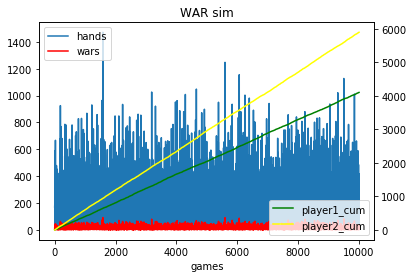

In [108]:
data = pd.read_csv('war_sim.csv')
data['player1_cum'] = data['player1'].cumsum()
data['player2_cum'] = data['player2'].cumsum()
data.index.name = 'games'

print(data.head(10))
data2 = data.head(10)

# can I get a middle slice of the data frame to plot?

ax1 = plt.gca()
#ax1.set_yscale("log")
ax2 = ax1.twinx()
#ax2.set_yscale("log")

data.plot(kind='line',use_index=True,y='hands', ax=ax1, title='WAR sim')
data.plot(kind='line',use_index=True,y='wars', color='red', ax=ax1)
data.plot(kind='line',use_index=True,y='player1_cum', color='green', ax=ax2)
data.plot(kind='line',use_index=True,y='player2_cum', color='yellow', ax=ax2)


#data2.plot(kind='line',use_index=True,y='hands', ax=ax1, title='WAR sim')
#data2.plot(kind='line',use_index=True,y='wars', color='red', ax=ax1)
#data2.plot(kind='line',use_index=True,y='player1_cum', color='green', ax=ax2)
#data2.plot(kind='line',use_index=True,y='player2_cum', color='yellow', ax=ax2)


ax1.legend(loc='upper left')
ax2.legend(loc='lower right')








#plt.savefig('war10.jpg')
